https://pythonot.github.io/auto_examples/plot_OT_2D_samples.html#sphx-glr-auto-examples-plot-ot-2d-samples-py

In [2]:
import matplotlib.pylab as pl
import numpy as np
import ot
import ot.plot

In [3]:
n = 50  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -0.8], [-0.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)

a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)

In [4]:
xs

array([[-1.51660122, -0.46797118],
       [-0.36379815,  0.50179909],
       [-0.1513292 ,  0.28856409],
       [-0.14988324, -0.69276254],
       [-0.22715573,  0.71527683],
       [ 1.10466719,  0.58013654],
       [ 0.31176339,  0.62661735],
       [ 0.79073557, -1.34647915],
       [ 1.87922595, -0.02750914],
       [ 0.69280103, -1.05029093],
       [-1.76483931, -0.53610694],
       [-0.14360556, -0.73994745],
       [-2.12360417, -0.22551331],
       [ 1.05819707,  0.28461036],
       [ 0.37122021,  1.09823097],
       [-1.6428582 , -1.87021243],
       [-0.20171615, -0.6496091 ],
       [ 0.03814872, -0.35761183],
       [-0.47785128,  1.5234285 ],
       [ 0.51474562,  0.22230813],
       [ 0.26170364,  1.07992797],
       [ 0.35791195,  0.24471148],
       [ 2.56933444, -1.50608737],
       [-1.14457322,  2.02312405],
       [ 0.93163041, -1.37767302],
       [-0.64247307,  0.15530782],
       [-0.74440356,  0.77853035],
       [-1.9885909 ,  0.83646988],
       [-0.29385869,

In [5]:
xt

array([[4.22165122, 3.36034354],
       [4.12468604, 3.84652062],
       [2.30850337, 5.48230516],
       [4.35903176, 3.69293085],
       [3.97032183, 4.38738402],
       [5.35813454, 3.16332607],
       [5.87406729, 2.87132359],
       [3.67943825, 4.22171562],
       [4.7075861 , 2.80668861],
       [3.25799605, 4.78583451],
       [5.86349709, 2.4747434 ],
       [4.03292196, 3.92669602],
       [4.81381222, 2.82313222],
       [4.07380951, 4.30213984],
       [5.32179126, 3.10026869],
       [5.43996871, 2.52743458],
       [3.380472  , 4.71085819],
       [4.93512548, 2.85772585],
       [3.69835558, 3.99181603],
       [3.43437796, 4.74876485],
       [3.93542354, 3.88056679],
       [2.4646989 , 4.78299768],
       [4.11335601, 3.12285563],
       [4.58653063, 4.1570027 ],
       [5.64487487, 2.43088838],
       [2.66953515, 5.39485698],
       [5.40067345, 3.64103025],
       [1.47293853, 6.66074517],
       [4.95265459, 2.45232708],
       [3.75346153, 4.01973555],
       [4.

In [7]:
M.shape

(50, 50)

Text(0.5, 1.0, 'Cost matrix M')

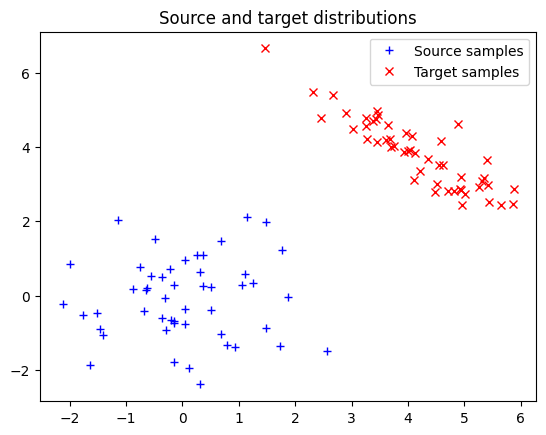

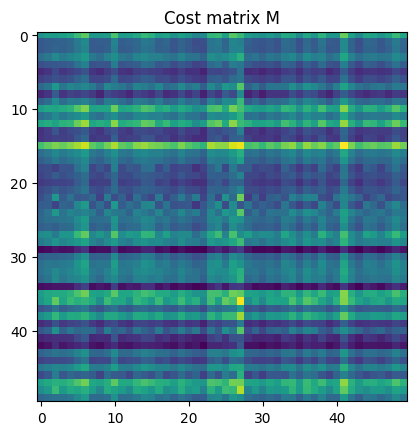

In [8]:
pl.figure(1)
pl.plot(xs[:, 0], xs[:, 1], "+b", label="Source samples")
pl.plot(xt[:, 0], xt[:, 1], "xr", label="Target samples")
pl.legend(loc=0)
pl.title("Source and target distributions")

pl.figure(2)
pl.imshow(M, interpolation="nearest")
pl.title("Cost matrix M")

Text(0.5, 1.0, 'OT matrix with samples')

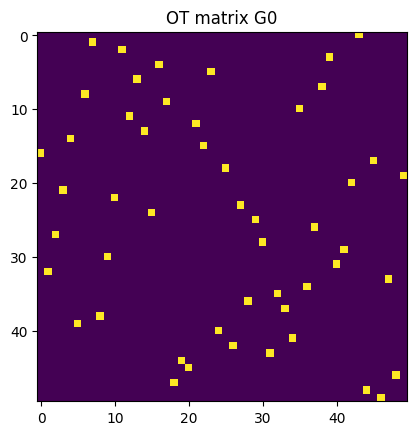

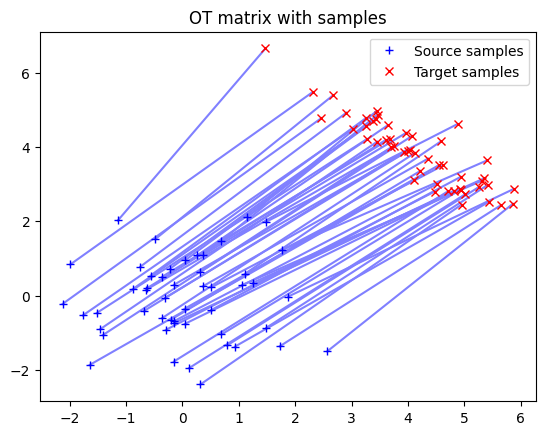

In [9]:
G0 = ot.emd(a, b, M)

pl.figure(3)
pl.imshow(G0, interpolation="nearest")
pl.title("OT matrix G0")

pl.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, G0, c=[0.5, 0.5, 1])
pl.plot(xs[:, 0], xs[:, 1], "+b", label="Source samples")
pl.plot(xt[:, 0], xt[:, 1], "xr", label="Target samples")
pl.legend(loc=0)
pl.title("OT matrix with samples")

/Users/yoshitakainoue/miniconda3/envs/torch/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


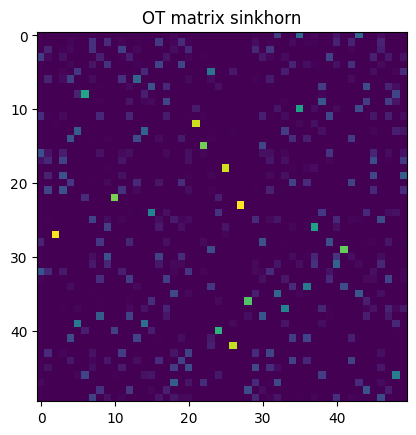

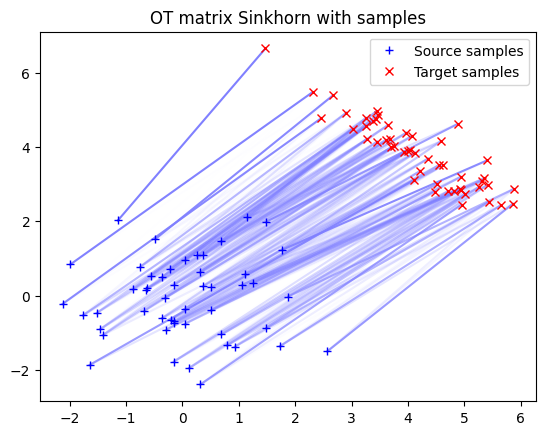

In [10]:
lambd = 1e-1

Gs = ot.sinkhorn(a, b, M, lambd)

pl.figure(5)
pl.imshow(Gs, interpolation="nearest")
pl.title("OT matrix sinkhorn")

pl.figure(6)
ot.plot.plot2D_samples_mat(xs, xt, Gs, color=[0.5, 0.5, 1])
pl.plot(xs[:, 0], xs[:, 1], "+b", label="Source samples")
pl.plot(xt[:, 0], xt[:, 1], "xr", label="Target samples")
pl.legend(loc=0)
pl.title("OT matrix Sinkhorn with samples")

pl.show()

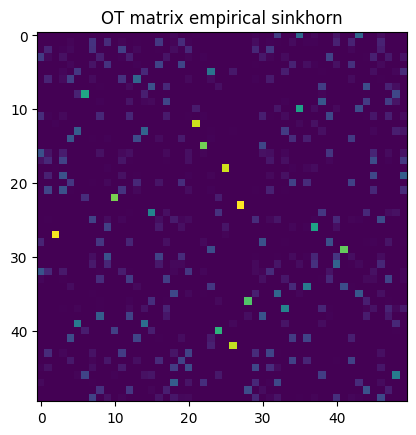

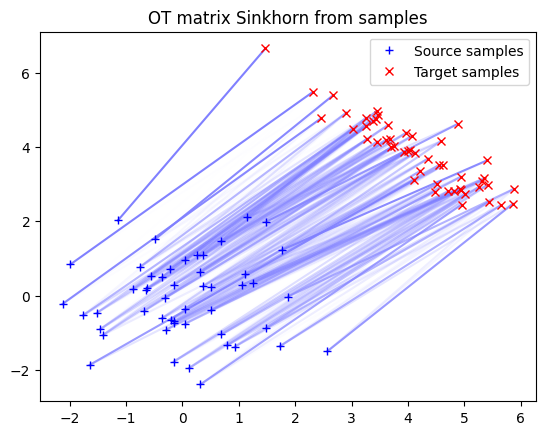

In [11]:
# reg term
lambd = 1e-1

Ges = ot.bregman.empirical_sinkhorn(xs, xt, lambd)

pl.figure(7)
pl.imshow(Ges, interpolation="nearest")
pl.title("OT matrix empirical sinkhorn")

pl.figure(8)
ot.plot.plot2D_samples_mat(xs, xt, Ges, color=[0.5, 0.5, 1])
pl.plot(xs[:, 0], xs[:, 1], "+b", label="Source samples")
pl.plot(xt[:, 0], xt[:, 1], "xr", label="Target samples")
pl.legend(loc=0)
pl.title("OT matrix Sinkhorn from samples")

pl.show()